In [13]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_files
import joblib
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix


In [14]:
DATA_DIR = "dataset_5classes"

data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace")
metadata = np.unique(data.target, return_counts=True)

In [15]:
labels=metadata[0]
count=metadata[1]
class_names=data.target_names

print("cls/name/no_of_docs")
for i in range(len(labels)):
    print(labels[i], class_names[i], count[i])


cls/name/no_of_docs
0 business 510
1 entertainment 385
2 politics 417
3 sport 511
4 tech 401


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state = False)#test_size=0.50
print("X_test.shape=",len(X_test))
print("Y_test.shape=",y_test.shape)
print("X_train.shape=",len(X_train))
print("y_train.shape=",y_train.shape)

X_test.shape= 445
Y_test.shape= (445,)
X_train.shape= 1779
y_train.shape= (1779,)


In [17]:
#count vectorizer for BOW, just implemented and not used
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [18]:
#tfidf -used here
vectorizer = TfidfVectorizer(stop_words="english", max_features=2000, decode_error="ignore")
vectorizer.fit(X_train)
keywords=vectorizer.get_feature_names()
X_train_vectorized = vectorizer.transform(X_train)
keywords

/home/ila/anaconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '100',
 '100m',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1980s',
 '1994',
 '1997',
 '1998',
 '1999',
 '1bn',
 '1m',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2008',
 '200m',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2bn',
 '30',
 '300',
 '31',
 '32',
 '34',
 '35',
 '3bn',
 '3g',
 '40',
 '45',
 '4bn',
 '4m',
 '50',
 '500',
 '5bn',
 '5m',
 '60',
 '60m',
 '65',
 '6bn',
 '70',
 '75',
 '7m',
 '80',
 '800m',
 '8bn',
 '8m',
 '90',
 'ability',
 'able',
 'abroad',
 'absolutely',
 'academy',
 'accept',
 'accepted',
 'access',
 'according',
 'account',
 'accounts',
 'accused',
 'achieved',
 'act',
 'acting',
 'action',
 'actions',
 'activity',
 'actor',
 'actress',
 'acts',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'administration',
 'admitted',
 'adults',
 'advantage',
 'advertising',
 'advice',
 'affairs',
 'affected',
 'africa',
 'african',
 'age',
 'aged',
 'agency',
 'agenda',
 '

In [19]:
#naivebayes
cls = MultinomialNB(alpha=0.001)
clf = RandomForestClassifier(n_estimators = 5) #ensemble method
cls.fit(vectorizer.transform(X_train), y_train)
joblib.dump(cls, "" + 'nb_model.h5')
y_pred = cls.predict(vectorizer.transform(X_test))
print("accuracy with naive bayes = ",accuracy_score(y_test, y_pred))

accuracy with naive bayes =  0.9730337078651685


In [20]:
# svc model
svc_tfidf = Pipeline([
    ("tfidf_vectorizer", TfidfVectorizer(stop_words="english", max_features=3000)),
    ("linear svc", SVC(kernel="linear"))])

models = [("svc_tfidf", svc_tfidf), ]
svc_score = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model in models]
scores = sorted(svc_score, key=lambda x: -x[1])
print("svc accuracy ",scores)

svc accuracy  [('svc_tfidf', 0.9685216314252854)]


/home/ila/anaconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ila/anaconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


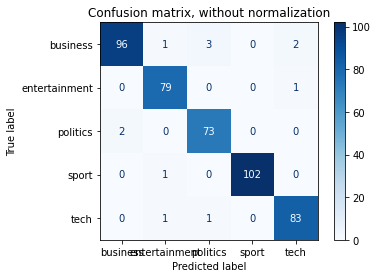

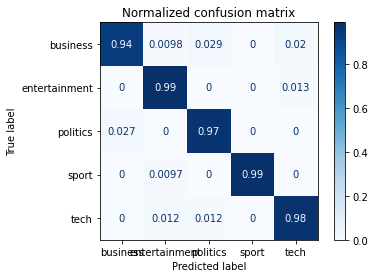

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cls, vectorizer.transform(X_test), y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()
plt.savefig("cf.png", format='png')